# 6.2 Boat Sales _Exploring Relationships

### This script contains the following:

### 1. Importing Visualization Libraries and Data
### 2. Data Cleaning
### 3. Exploring Relationships 
  ###  Correlations
   ### Scatterplots
  ###   Pair Plots
  ###   Categorical Plots

In [3]:
## Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy
import scikitplot as skplt
import sklearn
import os


In [4]:
matplotlib.__version__ 

'3.7.1'

In [5]:
## Importing Data
path = r"C:\Users\Mafalda\Documents\mafalda\Formação\Data Analytics\CareerFoundry\Data Analytics Program\2.Data Immersion\Achievement 6\Boat Sales Analysis"

In [6]:
df = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_cleaned.xlsx'), index_col = False)

In [7]:
df.shape

(9893, 13)

In [8]:
df.columns


Index(['Price', 'Boat Type', 'Manufacturer', 'Condition', 'Fuel ', 'Boat Age',
       'Year Built', 'Length', 'Width', 'Boat Area (m2)', 'Visits', 'Material',
       'Country'],
      dtype='object')

In [9]:
df.shape

(9893, 13)

In [10]:
df.head()

,Price,Boat Type,Manufacturer,Condition,Fuel,Boat Age,Year Built,Length,Width,Boat Area (m2),Visits,Material,Country
0,3537,Motor Yacht,Rigiflex power boats,Used,NaN,6,2017,4.00,1.90,7.60,226,Other,Switzerland
1,3490,Center console boat,Terhi power boats,Used,NaN,3,2020,4.00,1.50,6.00,75,Thermoplastic,Germany
2,3996,Sport Boat,Marine power boats,Used,NaN,2023,0,3.69,1.42,5.24,124,Aluminium,Switzerland
3,3367,Sport Boat,Pioner power boats,Used,NaN,3,2020,3.00,1.00,3.00,64,Other,Denmark
4,3399,Fishing Boat,Linder power boats,Used,NaN,4,2019,3.55,1.46,5.18,58,Aluminium,Germany


In [11]:
df.tail()

,Price,Boat Type,Manufacturer,Condition,Fuel,Boat Age,Year Built,Length,Width,Boat Area (m2),Visits,Material,Country
9888,5194,Sport Boat,Sea Ray power boats,Used,NaN,36,1987,6.30,2.44,15.37,1116,Other,Switzerland
9889,4516,Sport Boat,Other,New,NaN,2023,0,4.17,1.68,7.01,94,GRP,Germany
9890,4499,Sport Boat,BlueCraft power boats,New,NaN,3,2020,4.40,1.80,7.92,354,GRP,Germany
9891,4300,Pontoon Boat,Whaly power boats,Used,NaN,5,2018,4.37,1.89,8.26,266,Other,Italy
9892,4006,Fishing Boat,DarekCo power boats,New,NaN,4,2019,3.60,1.60,5.76,194,GRP,Switzerland


In [12]:
df.dtypes

Price               int64
Boat Type          object
Manufacturer       object
Condition          object
Fuel               object
Boat Age            int64
Year Built          int64
Length            float64
Width             float64
Boat Area (m2)    float64
Visits              int64
Material           object
Country            object
dtype: object

## Data Cleaning

In [13]:
# Checking for missing values
df.isnull().sum() 

Price                0
Boat Type            0
Manufacturer         0
Condition            0
Fuel              9808
Boat Age             0
Year Built           0
Length               0
Width                0
Boat Area (m2)       0
Visits               0
Material             0
Country              0
dtype: int64

#### No missing values 

In [14]:
# Checking for duplicates
df_dups = df[df.duplicated()]

In [15]:
df_dups

,Price,Boat Type,Manufacturer,Condition,Fuel,Boat Age,Year Built,Length,Width,Boat Area (m2),Visits,Material,Country


#### No duplicates found

In [23]:
# Checking for Mixed-Type Data
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

Fuel 


C:\Users\Mafalda\AppData\Local\Temp\ipykernel_10620\2690227181.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Mafalda\AppData\Local\Temp\ipykernel_10620\2690227181.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Mafalda\AppData\Local\Temp\ipykernel_10620\2690227181.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Mafalda\AppData\Local\Temp\ipykernel_10620\2690227181.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Mafalda\AppData\Local\Temp\ipykernel_10620\26902271

#### No mixed-type columns found

# Exploring Relationships

## Correlations

In [36]:
# Creating a correlation matrix using pandas
# Dropping categorical variables
df_sub=df.drop(['Boat Type', 'Manufacturer','Year Built','Fuel ','Condition', 'Material', 'Country'], axis = 1)
 

In [37]:
df_sub.head()

,Price,Boat Age,Length,Width,Boat Area (m2),Visits
0,3537,6,4.00,1.90,7.60,226
1,3490,3,4.00,1.50,6.00,75
2,3996,2023,3.69,1.42,5.24,124
3,3367,3,3.00,1.00,3.00,64
4,3399,4,3.55,1.46,5.18,58


In [38]:
# Creating the correlation matix 
df_sub.corr()

,Price,Boat Age,Length,Width,Boat Area (m2),Visits
Price,1.000000,-0.009736,0.562629,0.517336,0.639042,-0.008014
Boat Age,-0.009736,1.000000,-0.117287,-0.127020,-0.090451,-0.024837
Length,0.562629,-0.117287,1.000000,0.871131,0.949638,-0.134986
Width,0.517336,-0.127020,0.871131,1.000000,0.879706,-0.157318
Boat Area (m2),0.639042,-0.090451,0.949638,0.879706,1.000000,-0.103592
Visits,-0.008014,-0.024837,-0.134986,-0.157318,-0.103592,1.000000


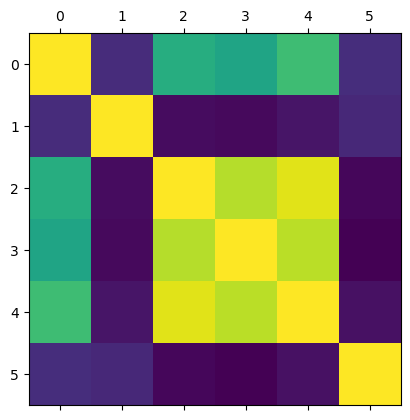

In [39]:
# Creating a correlation heatmap using matplotlib

plt.matshow(df_sub.corr())
plt.show()

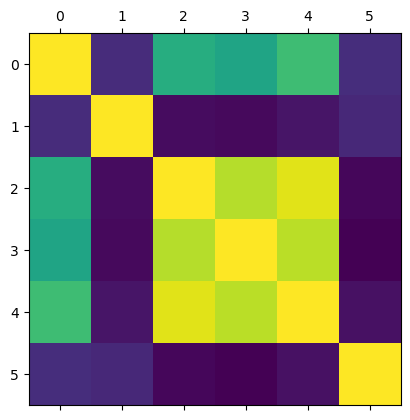

In [40]:
# Save figure
plt.matshow(df_sub.corr())
plt.savefig("out.png") 


In [41]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\Mafalda\\Documents\\mafalda\\Formação\\Data Analytics\\CareerFoundry\\Data Analytics Program\\2.Data Immersion\\Achievement 6\\Boat Sales Analysis\\03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

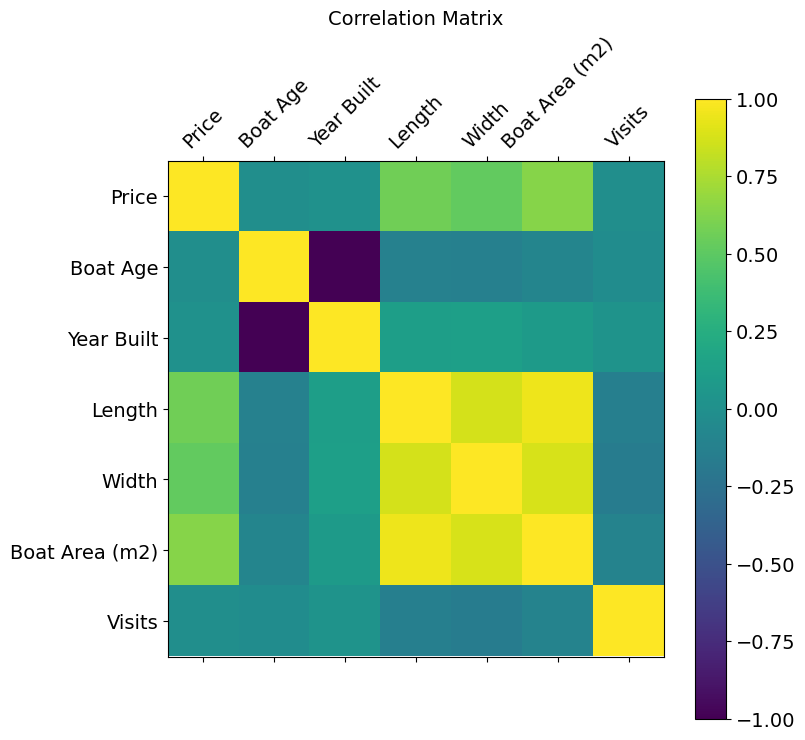

In [33]:
# Adding labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

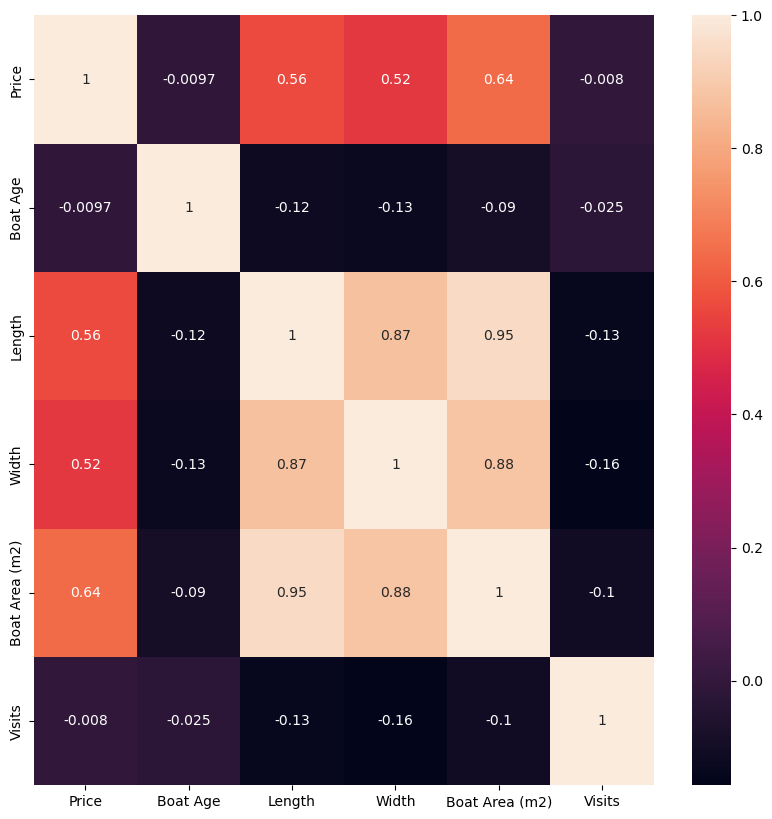

In [42]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.b

## Answer Q3

### Analyzing the heatmap we can see the following results:
### - The Price variable has a strong positive relationship with the variables Boat  Area (0.64), Width (0.52) and Length (0.56), and no relationship with the variable Visits (0) 
### - The Boat Age variable has a weak positive relationship with the Width (0.13) and Length (0.12), and no relationship with the variable Visits (0) 
###  - The Boat Area variables has a strong positive relationship with the variables Price (0.64), Width (0.88) and Length (0.95), and no relationship with the variable Visits (0) 
### - The variable Visits has no relationship with any of the other variables



## Scatterplots

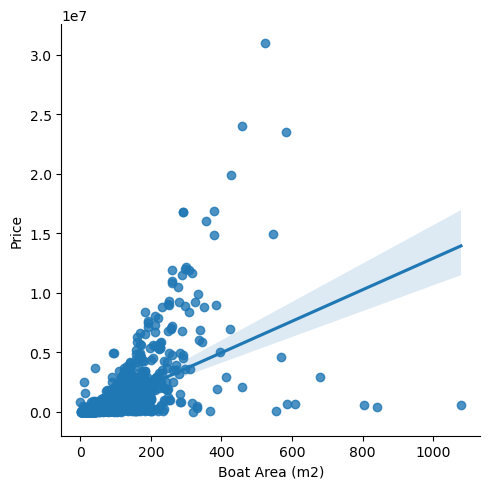

In [51]:
# Create a scatterplot for the "Boat Area" and "price " columns in seaborn
sns.lmplot(x = 'Boat Area (m2)', y = 'Price', data = df_sub)
plt.show()

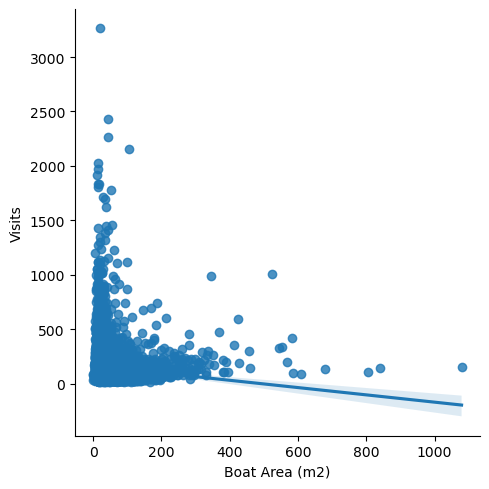

In [52]:
# Create a scatterplot for the "Boat Area" and "Visits " columns in seaborn
sns.lmplot(x = 'Boat Area (m2)', y = 'Visits', data = df_sub)
plt.show()

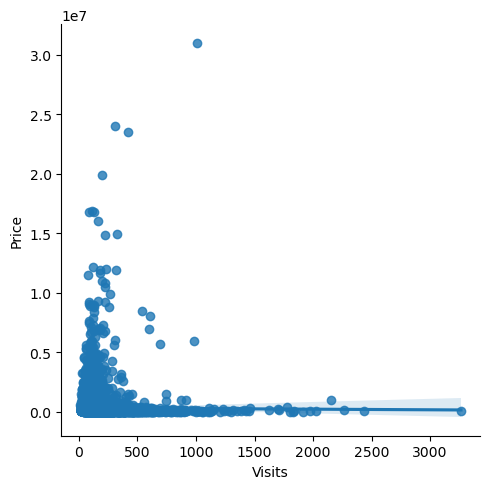

In [53]:
# Create a scatterplot for the "Visits" and "Price " columns in seaborn
sns.lmplot(x = 'Visits', y = 'Price', data = df_sub)
plt.show()

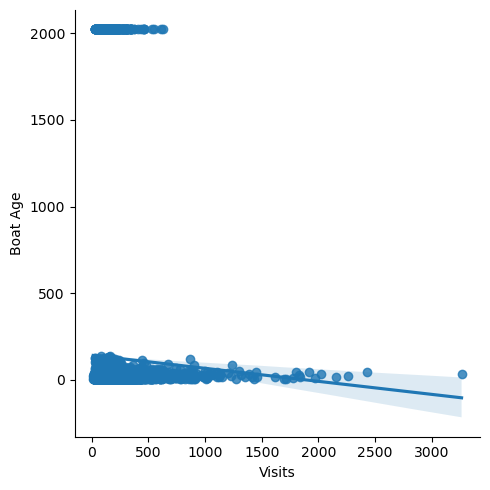

In [54]:
# Create a scatterplot for the "Visits" and "Boat Age " columns in seaborn
sns.lmplot(x = 'Visits', y = 'Boat Age', data = df_sub)
plt.show()

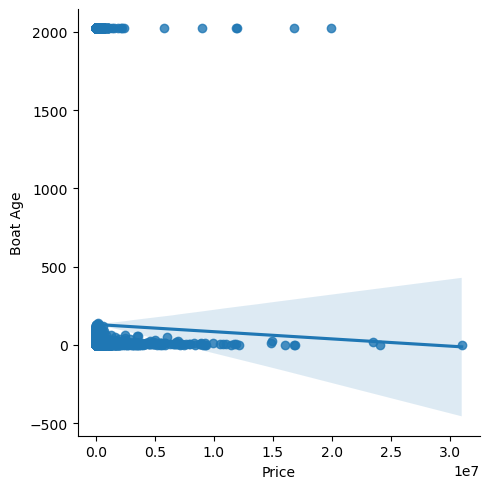

In [55]:
# Create a scatterplot for the "Boat Age" and "Price " columns in seaborn
sns.lmplot(x = 'Price', y = 'Boat Age', data = df_sub)
plt.show()

## Answer Q4

### The plots confirm the information presented on the heatmap.

## Pair Plots

In [61]:
# Keeping only the variables we want to use in the pair plot

df_sub1=df_sub[['Price', 'Visits', 'Boat Area (m2)', 'Boat Age']]

C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mafalda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


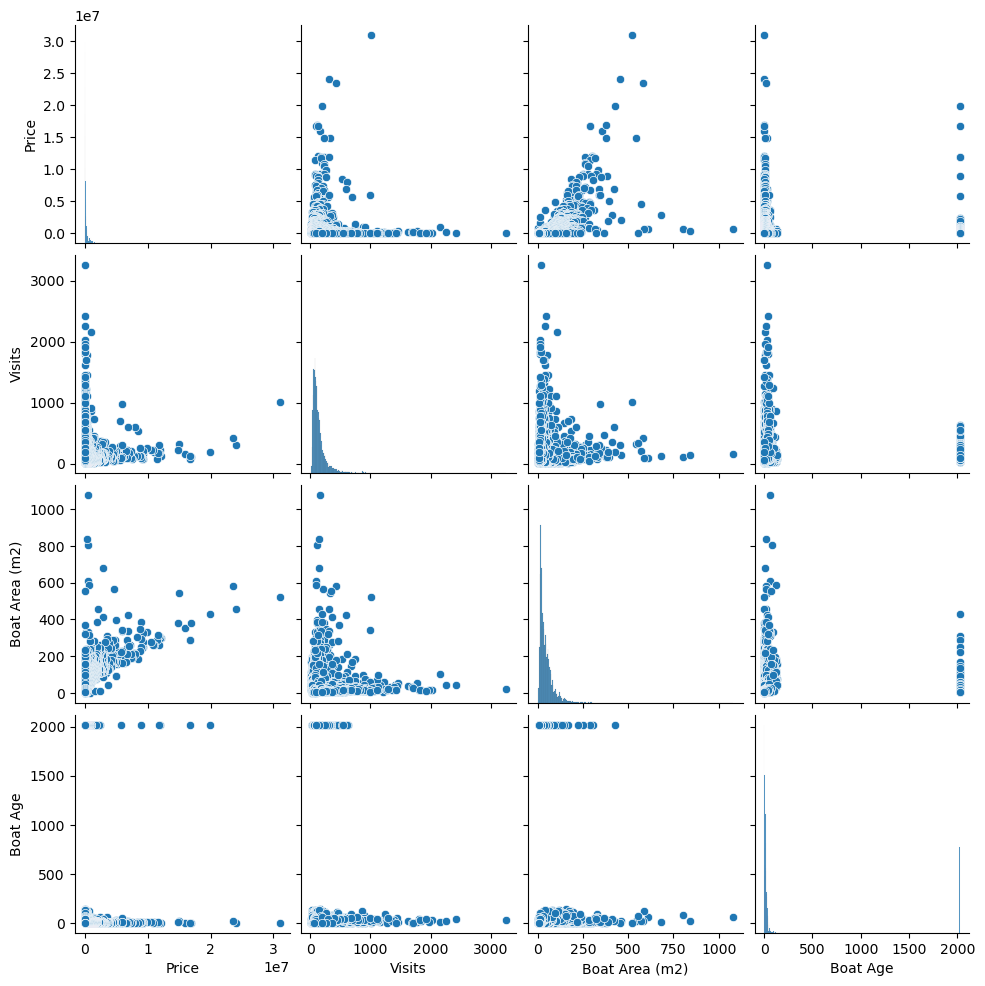

In [66]:
# Creating a pair plot 
g = sns.pairplot(df_sub1)


## Answer Q5
### I believe it´s worth exploring the relationship beetween Price/Boat Area, and since there is no other correlation found beetween numerical categories, then try explore the relatioships beeween the categorical ones


## Categorical Plots
